<a href="https://colab.research.google.com/github/Santos-Rf/Case-02-Datalab/blob/main/Dia_2_Case_Datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

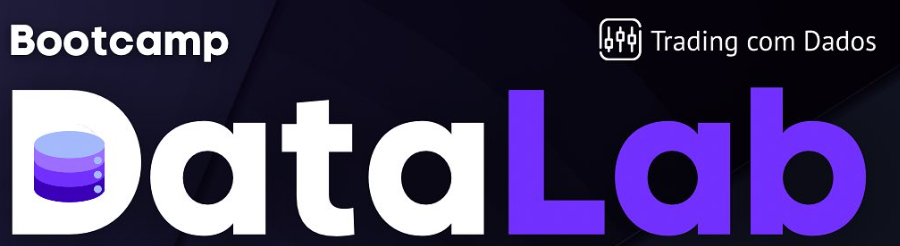

Desenvolvido por https://www.linkedin.com/in/arthur-camargo/

##Nivelamento em Python

Primeiros passos

In [ ]:
print('Hello world!')

Hello world!


Variáveis e tipos dados

In [ ]:
#string
nome = "ITUB4"
#integer
qtd_acoes = 9804137622
#float
preco = 28.90
#boolean
financeiro = True

In [ ]:
print(preco)

28.9


Estruturas condicionais

In [ ]:
if preco <= 18:
  print('Vou comprar essa ação')
else:
  print('Não vou comprar essa ação')

Não vou comprar essa ação


Listas

In [ ]:
portfolio = ['PETR4.SA','VALE3.SA', 'BBDC4.SA', 'ITSA4.SA']

In [ ]:
type(portfolio)

list

In [ ]:
print(portfolio[2])

BBDC4.SA


Funções

In [ ]:
def minha_acao(nome_acao):
  print(f"Minha ação é {nome_acao}!")

In [ ]:
minha_acao(nome)

Minha ação é ITUB4!


##Case

In [ ]:
!pip install yfinance

Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

Construção da carteira

In [ ]:
#Períodos
inicio = '2018-01-01'
fim = '2023-07-30'

#Seleção de ativos da carteira

ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITUB4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA']

In [ ]:
pesos = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [ ]:
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']

In [ ]:
carteira.head()

In [ ]:
carteira.columns

In [ ]:
carteira.index

In [ ]:
carteira

In [ ]:
retornos = carteira.pct_change()
retornos

In [ ]:
retorno_carteira = (retornos * pesos).sum(axis=1)
retorno_carteira

In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira
retorno_portfolio

# Backtesting

In [ ]:
!pip install vectorbt

In [ ]:
import vectorbt as vbt

In [ ]:
w = pd.DataFrame(pesos, index=carteira.columns, columns=['Pesos'])
w

In [ ]:
pesos= np.array(w.values)

In [ ]:
tamanho = np.full_like(carteira, np.nan)
tamanho

In [ ]:
tamanho[0,:] = np.concatenate(pesos)
tamanho

In [ ]:
#Backtesting
pf = vbt.Portfolio.from_orders(
    close=carteira,
    size=tamanho,
    size_type='targetpercent',
    group_by=True,
    cash_sharing=True
)

print(len(pf.orders))

In [ ]:
pf.stats(settings=dict(risk_free=0, freq='d'))

In [ ]:
pf.plot().show()

In [ ]:
pf.drawdowns.plot().show()

In [ ]:
pf.plot_underwater().show()